In [ ]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

### Analysis Pipeline 
1. load the data 
2. explore the data 
3. compare the models 
4. ROC curve & AUC score & PR curve
5. F1 score



### Explore the data

In [2]:
# Load the results from model 1
# calulate how many animal species are in the results

df_train = pd.read_csv('~/CameraTraps/classification/BASE_LOGDIR/mirav2/outputs_train.csv')
df_val = pd.read_csv('~/CameraTraps/classification/BASE_LOGDIR/mirav2/outputs_val.csv')
df_test = pd.read_csv('~/CameraTraps/classification/BASE_LOGDIR/mirav2/outputs_test.csv')
df_test.head()


,path,label,weight,bird,fox,lizard,rodent,scrub jay,skunk
0,mirav2_dataset/loc-h500ee07133450/000/009.jpg_...,rodent,0.299275,1.213028e-01,1.918221e-01,5.783474e-05,6.857130e-01,3.487533e-04,7.555791e-04
1,mirav2_dataset/loc-h500ee07133450/000/010.jpg_...,rodent,0.299275,2.765466e-05,7.763770e-07,8.221242e-08,9.999712e-01,3.195493e-07,8.999244e-09
2,mirav2_dataset/loc-h500ee07133450/000/011.jpg_...,rodent,0.299275,1.747305e-02,2.256891e-02,4.593492e-04,2.612599e-04,2.382994e-04,9.589992e-01
3,mirav2_dataset/loc-h500ee07133258/000/000.jpg_...,fox,0.517075,4.150726e-08,9.999837e-01,1.076929e-09,1.098083e-05,1.412573e-06,3.953084e-06
4,mirav2_dataset/loc-h500ee07133258/000/001.jpg_...,fox,0.517075,3.727612e-13,9.999995e-01,6.491059e-15,6.489738e-10,3.991921e-12,5.216569e-07


In [3]:
df = pd.concat([df_train, df_val, df_test])
df.head()

,path,label,weight,bird,fox,lizard,rodent,scrub jay,skunk
0,mirav2_dataset/loc-h500ee07133495/000/005.jpg_...,fox,0.490316,1.297812e-17,1.000000,5.528587e-19,8.808427e-11,2.021834e-17,3.581323e-18
1,mirav2_dataset/loc-h500ee07133495/000/006.jpg_...,fox,0.490316,8.667226e-09,1.000000,1.061429e-08,6.111339e-08,4.923424e-10,4.014444e-10
2,mirav2_dataset/loc-h500ee07133495/000/007.jpg_...,fox,0.490316,4.965319e-08,1.000000,3.400253e-08,2.855523e-08,3.934005e-10,6.268715e-11
3,mirav2_dataset/loc-h500ee07133495/000/008.jpg_...,fox,0.490316,3.278755e-11,1.000000,1.555252e-10,6.483605e-10,6.105010e-13,1.098609e-12
4,mirav2_dataset/loc-h500ee07133495/000/009.jpg_...,fox,0.490316,3.769914e-08,0.999999,5.728963e-07,1.987321e-08,1.558845e-10,2.362147e-11


In [4]:
df['label'].value_counts()

rodent       75958
fox          52047
bird         13072
lizard        6336
scrub jay     2555
skunk         2251
Name: label, dtype: int64

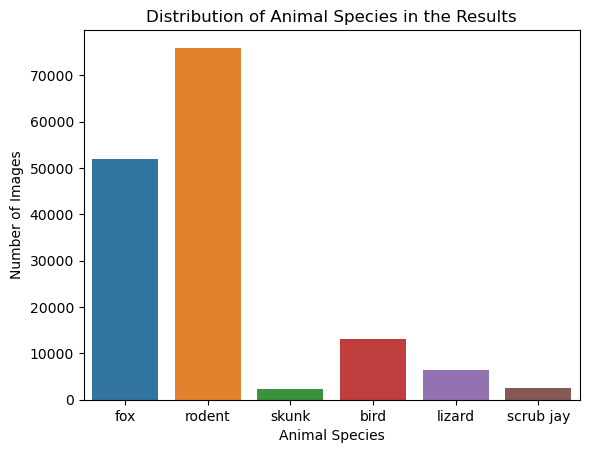

In [5]:
df['label'].value_counts()

#plot the species distribution from the all data 
sns.countplot(x='label', data=df)
# add labels and species numbers
# add number to each species

plt.xlabel('Animal Species')
plt.ylabel('Number of Images')
plt.title('Distribution of Animal Species in the Results')
plt.show()

# imbalance in the species distribution

In [6]:
# extract the location information from the file name
df['location']=df['path'].str.split('/').str[1]
df['location'].value_counts().head()

loc-h500ee07133550    15455
loc-h500hh06211894    15144
loc-h500ee07133326    11264
loc-h500hh06211646     8527
loc-h500hh07215715     8236
Name: location, dtype: int64

<AxesSubplot:xlabel='location', ylabel='count'>

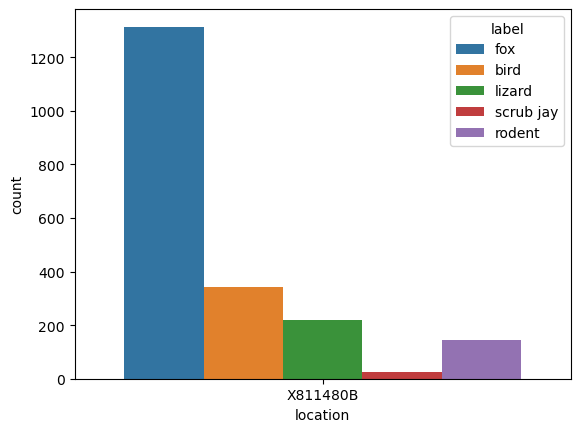

In [7]:
# analyze the location compare the predicted and actual species
# plot the species distribution from the all data
# group by location and plot the species distribution
# select one location to plot
df_location_1 = df[df['location']=='X811480B']
sns.countplot(x='location', hue='label', data=df_location_1)

<AxesSubplot:xlabel='location', ylabel='count'>

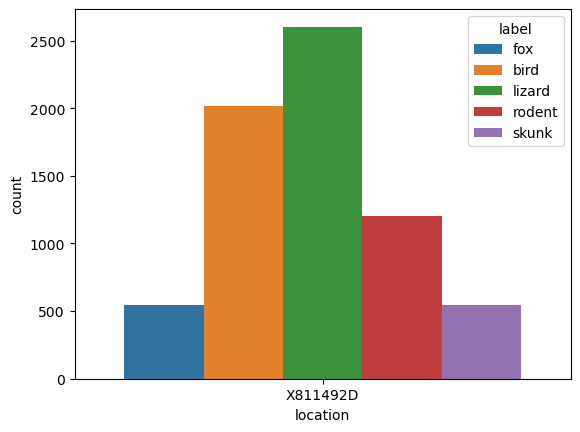

In [8]:
df_location_2 = df[df['location']=='X811492D']
sns.countplot(x='location', hue='label', data=df_location_2)

### Create a prediction label with the highest probability

In [9]:
# predict the species with the highest probability
df_train['pred'] = df_train.iloc[:, 3:].idxmax(axis=1)
df_val['pred'] = df_val.iloc[:, 3:].idxmax(axis=1)
df_test['pred'] = df_test.iloc[:, 3:].idxmax(axis=1)

In [10]:
df_val['pred'].value_counts()

fox          10165
rodent        9833
bird          2341
lizard        1803
skunk          902
scrub jay      366
Name: pred, dtype: int64

In [11]:
train_confusion = confusion_matrix(df_train['label'], df_train['pred'])
val_confusion = confusion_matrix(df_val['label'], df_val['pred'])
test_confusion = confusion_matrix(df_test['label'], df_test['pred'])

In [12]:
test_confusion

array([[ 2251,   201,    63,    16,   196,    12],
       [   26, 11615,     3,    98,    13,    36],
       [   58,    43,   415,     1,    11,     0],
       [  438,   859,    63, 18774,    16,   222],
       [    8,     3,     9,     0,   588,     0],
       [   10,    40,     0,    10,     0,   483]])

In [13]:
# verify confusion matrix
cm = np.load("/home/wliao14/CameraTraps/classification/BASE_LOGDIR/mirav2/confusion_matrices.npz")
cm['test']

array([[ 2251,   201,    63,    16,   196,    12],
       [   26, 11615,     3,    98,    13,    36],
       [   58,    43,   415,     1,    11,     0],
       [  438,   859,    63, 18774,    16,   222],
       [    8,     3,     9,     0,   588,     0],
       [   10,    40,     0,    10,     0,   483]])

In [14]:
import itertools
# plot the confusion matrix for multiple classes
# https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    normalize:    If False, plot the raw numbers
                  If True, plot the proportions
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # normalize the confusion matrix
        # print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    # print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [15]:
classes = df.columns[3:-1]
classes

Index(['bird', 'fox', 'lizard', 'rodent', 'scrub jay', 'skunk'], dtype='object')

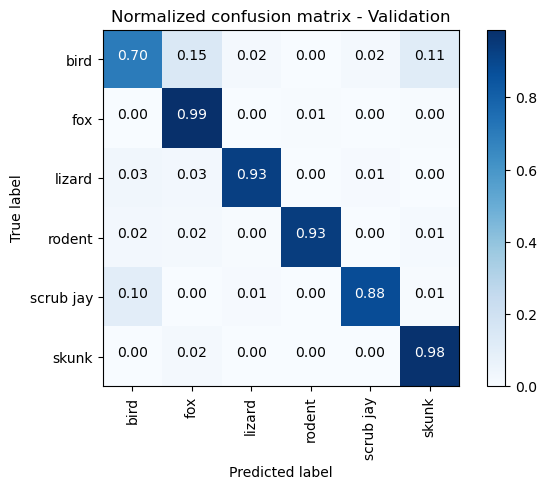

In [16]:
plot_confusion_matrix(val_confusion, classes , normalize=True,
                        title='Normalized confusion matrix - Validation')
plt.show()

It's worth noting that the confusion matrix doesn't tell the whole story about the performance of a classification model, as different misclassifications may have different implications depending on the specific problem. Additionally, it's always a good to look at other metrics such as ROC curve, precision, recall, and F1-score, to get a more complete picture of the model's performance.

In [17]:
def precision_recall(confusion_matrix):
    # precision = tp / (tp + fp)
    # recall = tp / (tp + fn)
    # f1 = 2 * (precision * recall) / (precision + recall)
    # https://en.wikipedia.org/wiki/Precision_and_recall
    # https://en.wikipedia.org/wiki/F1_score
    precision = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis = 0)  # true positive rate = tp / (tp + fp) <- precision
    TP_rate = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis = 1) # true positive rate = tp / (tp + fn) <- recall
    FP_rate = np.sum(confusion_matrix, axis = 0) - np.diag(confusion_matrix) # false positive rate = fp / (fp + tn) <- fall-out
    f1 = 2 * (precision * TP_rate) / (precision + TP_rate) # f1 = 2 * (precision * recall) / (precision + recall)
    return precision, TP_rate, FP_rate, f1

In [18]:
from sklearn.metrics import roc_curve

In [19]:
def ROC_curve(thresholds, data, classes):
    tpr = [1]
    fpr = [1]
    for i in thresholds:
        confusion_matrix_ = confusion_matrix(data['pred'], data['label'])
        precision, TP_rate, FP_rate, f1 = precision_recall(confusion_matrix_)
        tpr.append(TP_rate)
        fpr.append(FP_rate)

    from sklearn.metrics import roc_curve
    plt.figure(figsize=(10, 5))
    auc_score = []
    for i in range(len(classes)):
        fpr, tpr, _ = roc_curve(data['label'], data.iloc[:, 3:-1].iloc[:, i], pos_label = classes[i])
        plt.plot(fpr, tpr, label = classes[i])
        auc = 0
        for i in range(len(tpr)-1):
            auc += (tpr[i] + tpr[i+1]) * (fpr[i+1] - fpr[i]) / 2
        auc_score.append(auc)

    # plot the ROC curve using matplotlib
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Multiple Classes (Validation)')
    plt.legend()
    plt.show()

    #calculate AUC area under curve for each class
    # from sklearn.metrics import auc
    # auc = []
    # for i in range(len(classes)):
    #     fpr, tpr, _ = roc_curve(data['label'], data.iloc[:, 3:-1].iloc[:, i], pos_label = classes[i])
    #     auc.append(auc(fpr, tpr))
    
    # print the AUC score for each class
    for i in range(len(classes)):
        print('AUC for class {} is {}'.format(classes[i], auc_score[i]))
    return auc_score


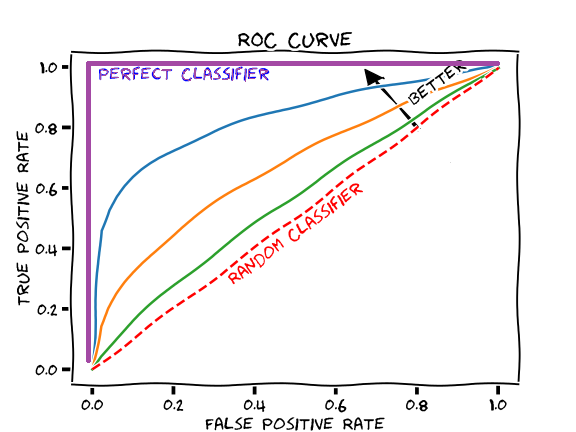

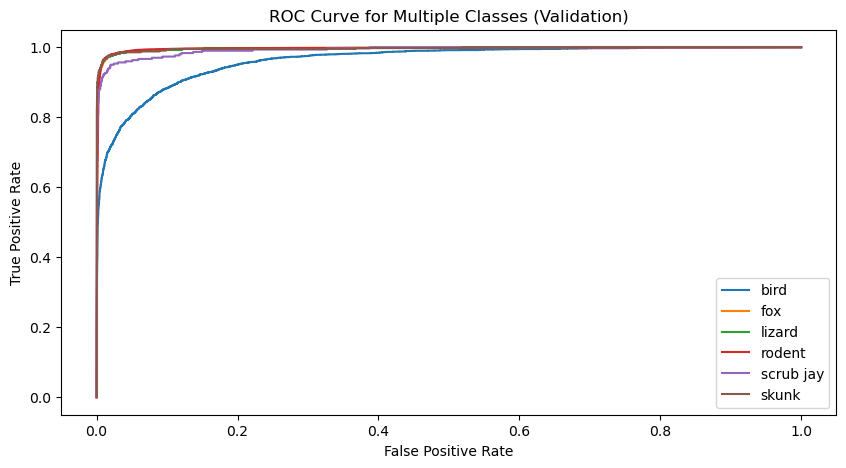

AUC for class bird is 0.9620625033284056
AUC for class fox is 0.996497910354184
AUC for class lizard is 0.9963721822899441
AUC for class rodent is 0.9960608275331769
AUC for class scrub jay is 0.9923252464742164
AUC for class skunk is 0.9961513748532839


[0.9620625033284056,
 0.996497910354184,
 0.9963721822899441,
 0.9960608275331769,
 0.9923252464742164,
 0.9961513748532839]

In [20]:
ROC_curve(np.arange(0, 1, 0.01), df_val, classes)

### Load all the models and predict the labels

### some parameters to tune(batch size and weight-decay). 
Batch size of 1 (Stochastic Gradient Descent): This approach uses a single training example to update the model weights in each iteration. This can lead to a high variance in the updates, but can also provide faster convergence and improved generalization.
  -> I tried this but the result is not as good as the last one.
Batch size of 32-128
  -> still trying to do this

- model1's weight decay = 1e-06, batch size = 80 (original model)
- model2's weight decay = 1e-02
- model3's batch size = 1 (stochastic gradient descent)
- model4's batch size = 30 
- model5's batch size = 50 

In [144]:
# Load the results

df_train_model1 = pd.read_csv('~/CameraTraps/classification/BASE_LOGDIR/mirav2/outputs_train.csv')
df_val_model1 = pd.read_csv('~/CameraTraps/classification/BASE_LOGDIR/mirav2/outputs_val.csv')
df_test_model1 = pd.read_csv('~/CameraTraps/classification/BASE_LOGDIR/mirav2/outputs_test.csv')


df_train_model2 = pd.read_csv('~/animl-implement/result/0222/20230222_021024/outputs_train.csv')
df_val_model2 = pd.read_csv('~/animl-implement/result/0222/20230222_021024/outputs_val.csv')
df_test_model2 = pd.read_csv('~/animl-implement/result/0222/20230222_021024/outputs_test.csv')

# # #load the model 3

# df_train_model3 = pd.read_csv('~/CameraTraps/classification/BASE_LOGDIR/batch_size_parameters/1/20230301_034813/outputs_train.csv')
# df_val_model3 = pd.read_csv('~/CameraTraps/classification/BASE_LOGDIR/batch_size_parameters/1/20230301_034813/outputs_val.csv')
# df_test_model3 = pd.read_csv('~/CameraTraps/classification/BASE_LOGDIR/batch_size_parameters/1/20230301_034813/outputs_test.csv')

# #load the model 4
# df_train_model4 = pd.read_csv('~/CameraTraps/classification/BASE_LOGDIR/batch_size_parameters/60/20230301_005312/outputs_train.csv')
# df_val_model4 = pd.read_csv('~/CameraTraps/classification/BASE_LOGDIR/batch_size_parameters/60/20230301_005312/outputs_val.csv')
# df_test_model4 = pd.read_csv('~/CameraTraps/classification/BASE_LOGDIR/batch_size_parameters/60/20230301_005312/outputs_test.csv')

# #load the model 5
# df_train_model5 = pd.read_csv('~/CameraTraps/classification/BASE_LOGDIR/batch_size_parameters/60/20230228_234620/outputs_train.csv')
# df_val_model5 = pd.read_csv('~/CameraTraps/classification/BASE_LOGDIR/batch_size_parameters/60/20230228_234620/outputs_val.csv')
# df_test_model5 = pd.read_csv('~/CameraTraps/classification/BASE_LOGDIR/batch_size_parameters/60/20230228_234620/outputs_test.csv')

In [145]:
# predict the species with the highest probability for model 2 to model 6
# create a for loop to do this for all the models

def predict_species(df):
    df['pred'] = df.iloc[:, 3:].idxmax(axis = 1)
    return df
predict_species(df_val_model2)

def predict_species(df):
    df['pred'] = df.iloc[:, 3:-1].idxmax(axis = 1)
    return df
predict_species(df_val_model1)

# model_list = [df_train_model1, df_val_model1, df_test_model1, df_train_model2, df_val_model2, df_test_model2 ]#, df_train_model3, df_val_model3, df_test_model3, df_train_model4, df_val_model4, df_test_model4, df_train_model5, df_val_model5, df_test_model5]
# for i in range(len(model_list)):
#     predict_species(model_list[i])

,path,label,weight,bird,fox,lizard,rodent,scrub jay,skunk,pred
0,mirav2_dataset/loc-h500ee07133376/000/086.jpg_...,fox,0.441790,3.734033e-09,1.000000e+00,4.090851e-14,9.983020e-12,6.485392e-12,2.562433e-09,fox
1,mirav2_dataset/loc-h500ee07133376/000/087.jpg_...,fox,0.441790,1.276096e-11,1.000000e+00,1.121936e-14,2.174303e-08,5.108855e-12,2.274605e-10,fox
2,mirav2_dataset/loc-h500ee07133376/000/088.jpg_...,fox,0.441790,6.296354e-11,9.999992e-01,7.142781e-14,3.530066e-09,4.641423e-09,8.178529e-07,fox
3,mirav2_dataset/loc-h500ee07133376/000/089.jpg_...,fox,0.441790,5.639691e-12,9.999999e-01,5.760029e-14,1.694272e-07,1.438960e-10,1.635343e-10,fox
4,mirav2_dataset/loc-h500ee07133376/000/090.jpg_...,fox,0.441790,5.547539e-18,1.000000e+00,1.231157e-15,3.852544e-08,2.071547e-12,3.465329e-11,fox
...,...,...,...,...,...,...,...,...,...,...
25405,mirav2_dataset/X8115CB7/p_012017_465bd72cc8b54...,rodent,0.405612,2.441563e-02,5.505114e-06,5.270331e-05,9.741090e-01,2.548241e-04,1.162371e-03,rodent
25406,mirav2_dataset/X8115CB7/p_012018_c2db62d7f437f...,rodent,0.405612,1.743998e-05,1.116437e-04,2.672028e-07,9.998643e-01,2.683630e-07,6.039379e-06,rodent
25407,mirav2_dataset/X8115CB7/p_012019_65f79c99e81c8...,rodent,0.405612,2.129185e-03,8.929301e-06,2.575501e-05,9.900455e-01,4.031762e-06,7.786605e-03,rodent
25408,mirav2_dataset/X8115CB7/p_012020_a6069a5ac4295...,rodent,0.405612,2.783561e-08,1.167460e-09,1.727278e-08,1.000000e+00,7.149348e-09,9.478033e-09,rodent


In [57]:
# create confusion matrix associated with each model
# create a for loop to do this for all the models

def confusion_matrix_models(df):
    cm = pd.crosstab(df['label'], df['pred'], rownames = ['Actual'], colnames = ['Predicted'])
    # cm = confusion_matrix(df['pred'], df['label'])
    return cm

for i in range(len(model_list)):
    globals()['cm_model{}'.format(i+1)] = confusion_matrix_models(model_list[i])
cm_list = [cm_model1, cm_model2 ]#, cm_model3, cm_model4, cm_model5, cm_model6]

In [60]:
cm_list[1]

Predicted,bird,fox,lizard,rodent,scrub jay,skunk
Actual,,,,,,
bird,1991,415,59,10,48,326
fox,8,9460,6,69,4,39
lizard,63,48,1689,3,17,0
rodent,248,233,46,9749,35,130
scrub jay,31,0,3,1,262,2
skunk,0,9,0,1,0,405


In [25]:
def plot_ROC_curve_models(models, animals):
    fig, axs = plt.subplots(1, len(animals), figsize=(20, 4))
    plt.subplots_adjust(wspace=0.3)
    auc_scores = {}
    for i, animal in enumerate(animals):
        auc_scores[animal] = []
        for j, model in enumerate(models):
            fpr, tpr, _ = roc_curve(model['label'], model[animal], pos_label=animal)
            auc = np.trapz(tpr, fpr)
            auc_scores[animal].append(auc)
            axs[i].plot(fpr, tpr, label=f'model {j+1}')
            axs[i].plot([0, 1], [0, 1], 'k--')
            axs[i].set_xlabel('False Positive Rate', fontsize=12)
            axs[i].set_ylabel('True Positive Rate', fontsize=12)
            axs[i].set_title(f'ROC Curve for {animal}', fontsize=14)
            axs[i].legend(fontsize=10)
            cell_text = [[f'{auc:.3f}' for auc in auc_scores[animal]]]
            row_labels = [f'{animal} AUC']
            col_labels = [f'Model {j+1}' for j in range(len(models))]
            # change the position of the table
            # so that it is centered below the plot
            # and not overlapping with the plot
            # (x, y, width, height)
            table = axs[i].table(cellText=cell_text,
                                    rowLabels=row_labels,
                                    colLabels=col_labels,
                                    loc='bottom',
                                    bbox=[0.2, -0.5, 0.7, 0.3])
            table.auto_set_font_size(False)
            table.set_fontsize(8)
            table.scale(1, 1.5)
            # add color to the table associated with the max AUC score
            for (row, col), cell in table.get_celld().items():
                if (col == np.argmax(auc_scores[animal])):
                    cell.set_facecolor('lightgreen')
                    # set font color to red 
                    cell.set_text_props(color='red')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    fig.suptitle('ROC Curves and AUC Scores', fontsize=12)
    plt.show();
    return auc_scores

In [76]:
models = [df_val_model1, df_val_model2 ]#, df_val_model3, df_val_model4, df_val_model5]

### Load all the models and predict the labels

<b> some parameters to tune(batch size and weight-decay). </b>

`Batch size`
 
- Batch size of 1 (Stochastic Gradient Descent): This approach uses a single training example to update the model weights in each iteration. This can lead to a high variance in the updates, but can also provide faster convergence and improved generalization. (model 3 )
- Batch size of 32-128

`weight-decay`
- Common values for weight decay hyperparameter can range from 0.0001 to 0.1.

### Checkpoint 1

- model1's weight decay = 1e-06, batch size = 80 (original model)
- model2's weight decay = 1e-02
- model3's batch size = 1 (stochastic gradient descent)
- model4's batch size = 30 
- model5's batch size = 50 

In [ ]:
model1 = {
 "dataset_dir": "/home/wliao14/CameraTraps/classification/BASE_LOGDIR",
 "cropped_images_dir": "/home/wliao14/crops",
 "multilabel": false,
 "model_name": "efficientnet-b3",
 "pretrained": true,
 "finetune": 0,
 "label_weighted": true,
 "weight_by_detection_conf": false,
 "epochs": 50,
 "batch_size": 80,
 "lr": 3e-05,
 "weight_decay": 1e-06,
 "num_workers": 4,
 "logdir": "/home/wliao14/CameraTraps/classification/BASE_LOGDIR",
 "log_extreme_examples": 3,
 "seed": 3495
}

In [ ]:
model2 = {
 "dataset_dir": "/home/wliao14/CameraTraps/classification/BASE_LOGDIR",
 "cropped_images_dir": "/home/wliao14/crops",
 "multilabel": false,
 "model_name": "efficientnet-b3",
 "pretrained": true,
 "finetune": 0,
 "label_weighted": true,
 "weight_by_detection_conf": false,
 "epochs": 50,
 "batch_size": 90,
 "lr": 3e-05,
 "weight_decay": 1e-06,
 "num_workers": 4,
 "logdir": "/home/wliao14/CameraTraps/classification/BASE_LOGDIR",
 "log_extreme_examples": 3,
 "seed": 4153
}

In [28]:
df_model1 = np.load("/home/wliao14/CameraTraps/classification/BASE_LOGDIR/mirav2/confusion_matrices.npz")
df_model1_train, df_model1_val, df_model1_test = df_model1['train'], df_model1['val'], df_model1['test']

# read in the data 
df_model2 = np.load("/home/wliao14/animl-implement/data/models/experiment1/model1/confusion_matrices.npz")
df_model2_train, df_model2_val, df_model2_test = df_model2['train'], df_model2['val'], df_model2['test']

# df_model3 = np.load("/home/wliao14/animl-implement/data/models/model3/confusion_matrices.npz")
# df_model3_train, df_model3_val, df_model3_test = df_model3['train'], df_model3['val'], df_model3['test']

# df_model4 = np.load("/home/wliao14/animl-implement/data/models/model4/confusion_matrices.npz")
# df_model4_train, df_model4_val, df_model4_test = df_model4['train'], df_model4['val'], df_model4['test']

# df_model5 = np.load("/home/wliao14/animl-implement/data/models/model5/confusion_matrices.npz")
# df_model5_train, df_model5_val, df_model5_test = df_model5['train'], df_model5['val'], df_model5['test']


### Confusion Matrix and PR curve

In [139]:
df2_train = pd.read_csv('~/animl-implement/data/models/experiment1/model1/outputs_train.csv')
df2_val = pd.read_csv('~/animl-implement/data/models/experiment1/model1/outputs_val.csv')
df2_test = pd.read_csv('~/animl-implement/data/models/experiment1/model1/outputs_test.csv')
df2 = pd.concat([df2_train, df2_val, df2_test])
df2.head()

,path,label,weight,bird,fox,lizard,rodent,skunk
0,dataset1/X811480B/p_000232_5416f9c75606bc2093d...,fox,0.768660,1.330003e-14,1.000000,5.619855e-17,9.253115e-15,3.150770e-17
1,dataset1/X811480B/p_000230_7d5ceeb53e8005c3402...,fox,0.768660,3.278565e-09,1.000000,7.435326e-12,2.199840e-13,3.103492e-12
2,dataset1/X811480B/p_000372_c78c93a541ae0475f2e...,fox,0.768660,1.693232e-13,1.000000,1.881097e-15,7.300760e-14,2.338386e-22
3,dataset1/X811480B/p_000373_cca1bf9d54a27dc9996...,fox,0.768660,1.599664e-11,1.000000,3.949020e-13,1.200667e-10,1.041570e-15
4,dataset1/X811480B/p_000582_e6e45cc4e3a11ca78dc...,bird,0.619698,8.839586e-01,0.001933,1.005150e-03,1.130881e-01,1.484074e-05


In [140]:
classes_df2 = df2.columns[3:]
classes_df2

Index(['bird', 'fox', 'lizard', 'rodent', 'skunk'], dtype='object')

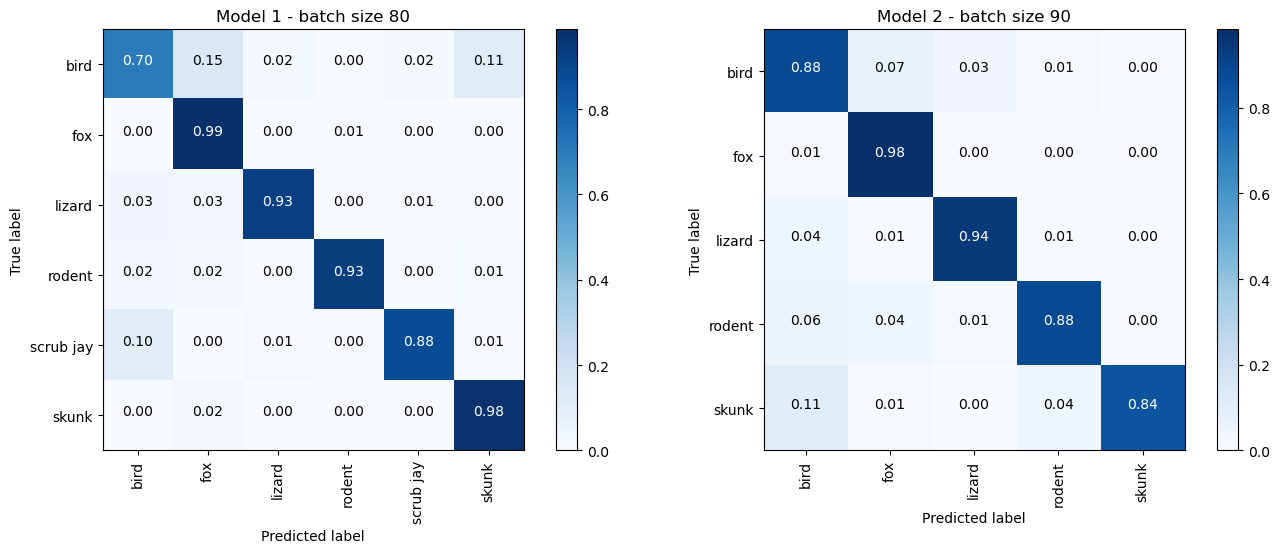

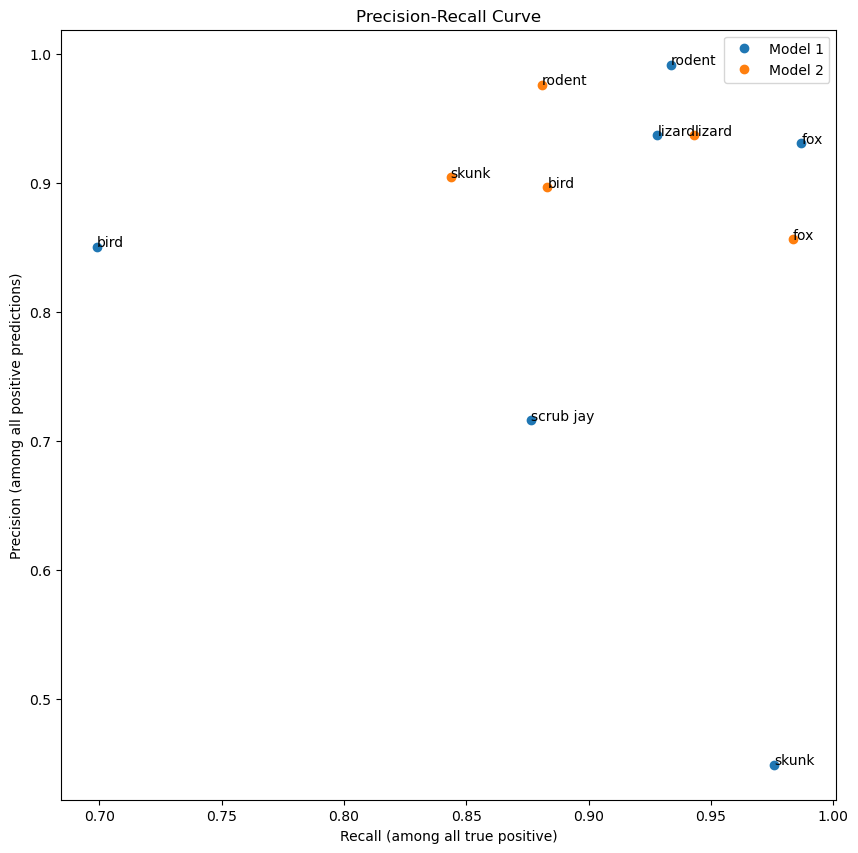

In [90]:
### Checkpoint 1
### compare mutilple models with different hyperparameters
### compare the performance of the models on the validation set

# plot the confusion matrix
plt.figure(figsize = (20, 10))
ax = plt.subplot(2, 3, 1)
plot_confusion_matrix(df_model1_val, classes=classes, normalize=True ,title = "Model 1 - batch size 80")
ax = plt.subplot(2, 3, 2)
plot_confusion_matrix(df_model2_val, classes=classes_df2, normalize=True,title = "Model 2 - batch size 90")
# ax = plt.subplot(2, 3, 3)
# plot_confusion_matrix(df_model3_val, classes=classes, normalize=True,title = "Model 3(batch size 1)")
# ax = plt.subplot(2, 3, 4)
# plot_confusion_matrix(df_model4_val, classes=classes, normalize=True,title = "Model 4(batch size 30)")
# ax = plt.subplot(2, 3, 5)
# plot_confusion_matrix(df_model5_val, classes=classes, normalize=True,title = "Model 5(batch size 50)")

plt.tight_layout()

plt.show();

# calculate the precision and recall for each class
precision1, recall1, fpr1, f1_1 = precision_recall(df_model1_val)
precision2, recall2, fpr2, f1_2 = precision_recall(df_model2_val)
# precision3, recall3, fpr3, f1_3 = precision_recall(df_model3_val)
# precision4, recall4, fpr4, f1_4 = precision_recall(df_model4_val)
# precision5, recall5, fpr5, f1_5 = precision_recall(df_model5_val)

# plot the precision and recall for each class
plt.figure(figsize = (10, 10))
#show all the classes as annotations
plt.plot(recall1, precision1, 'o', label = "Model 1")
plt.plot(recall2, precision2, 'o', label = "Model 2")
# plt.plot(recall3, precision3, 'o', label = "Model 3")
# plt.plot(recall4, precision4, 'o', label = "Model 4")
# plt.plot(recall5, precision5, 'o', label = "Model 5")
for i in range(len(classes)):
    plt.annotate(classes[i], (recall1[i], precision1[i]))
for i in range(len(classes_df2)):
    plt.annotate(classes_df2[i], (recall2[i], precision2[i]))
    # plt.annotate(classes[i], (recall3[i], precision3[i]))
    # plt.annotate(classes[i], (recall4[i], precision4[i]))
    # plt.annotate(classes[i], (recall5[i], precision5[i]))

plt.xlabel("Recall (among all true positive)")
plt.ylabel("Precision (among all positive predictions)")
plt.legend()
plt.title("Precision-Recall Curve")
plt.show();

In [96]:
classes

Index(['bird', 'fox', 'lizard', 'rodent', 'scrub jay', 'skunk'], dtype='object')

In [92]:
precision1

array([0.85049124, 0.93064437, 0.93677205, 0.99145734, 0.71584699,
       0.44900222])

In [94]:
recall1

array([0.6988417 , 0.98685583, 0.92802198, 0.93372282, 0.87625418,
       0.97590361])

In [97]:
classes_df2

Index(['bird', 'fox', 'lizard', 'rodent', 'skunk'], dtype='object')

In [93]:
precision2

array([0.89676797, 0.85614849, 0.93671679, 0.97609562, 0.90419162])

In [95]:
recall2

array([0.88313539, 0.98334444, 0.94321767, 0.88084232, 0.84357542])

It's worth noting that the confusion matrix doesn't tell the whole story about the performance of a classification model, as different misclassifications may have different implications depending on the specific problem. Additionally, it's always a good to look at other metrics such as ROC curve, precision, recall, and F1-score, to get a more complete picture of the model's performance.

### ROC curve
**We care about false negative rate, since we don't want to miss out any non-native species**
- plot ROC curve : The ROC curve is a graphical representation of the trade-off between the true positive rate (TPR) and the false positive rate (FPR) of a binary classification model, as the threshold for predicting positive class is varied.

false negative rate = 1 - true positive rate (among all true positive)

- AUC score : measures the overall ability of a classification model to discriminate between positive and negative instances across all possible classification thresholds.


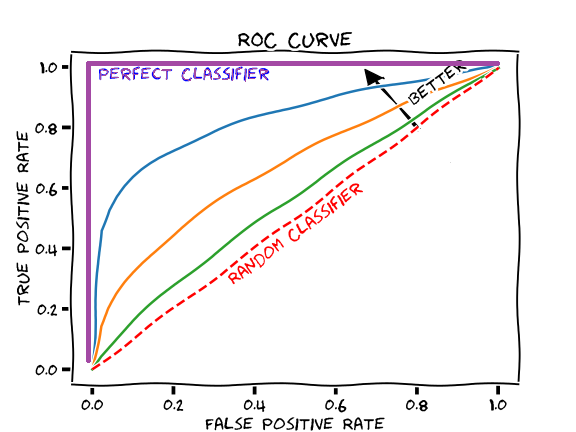

In [ ]:
plot_ROC_curve_models(models, classes)

### F1 score: 
F1 score is a performance metric that measures the accuracy of a classification model. It is the harmonic mean of precision and recall, where precision is the ratio of true positives to the sum of true positives and false positives, and recall is the ratio of true positives to the sum of true positives and false negatives. In general, the F1 score ranges from 0 to 1, with 1 being the best possible score, indicating perfect precision and recall.


In [78]:
# The class F-1 scores are averaged by using the number of instances in a class as weights
from sklearn.metrics import f1_score
for i in range(len(models)):
    print('F1 score for model {} is {}'.format(i+1, f1_score(models[i]['label'], models[i]['pred'], average='weighted')))

F1 score for model 1 is 0.928677375940929
F1 score for model 2 is 0.915158766531502


### Ground Truth vs False Negative 

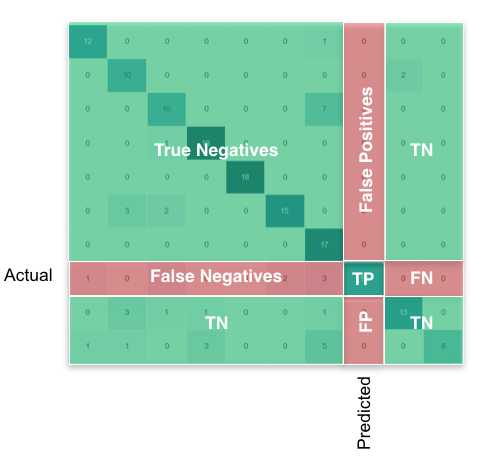

In [164]:
im = Image.open('/home/wliao14/AuTKP.png')
im

In [118]:
from PIL import Image
import random

### New experiment 

In [194]:
label = 'bird'
predict = 'skunk'

df_filter = df_val[(df_val['label'] == label) & (df_val['pred'] == predict)]
path = df_filter['path'].to_list()

There are total 326 Falsely Predict as skunk 
Ground Truth is bird, but it predict as skunk


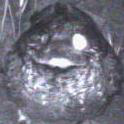

In [195]:
im = Image.open('/home/wliao14/crops/'+random.choice(path))
print(f'There are total {len(path)} Falsely Predict as {predict} ')
print(f'Ground Truth is {label}, but it predict as {predict}')  
im 

In [196]:
set([i.split('/')[2] for i in path])

{'p_000484_658ae117b5984b3c37edcdd8345b1519.jpg___crop00.jpg',
 'p_000485_2250e40411c945ef3ab19fc4311cdbb1.jpg___crop00.jpg',
 'p_000487_fad17d5bebf9b5227423330dca4a60f9.jpg___crop00.jpg',
 'p_000488_f5b018ab16c00c4b5abb6d3903d2374f.jpg___crop00.jpg',
 'p_000490_6520558a670b883bb9bdd111c9109495.jpg___crop00.jpg',
 'p_000491_c105a747fe4c2d39aca65c7d2befade1.jpg___crop00.jpg',
 'p_000493_f6c24a303f44db2ffe0554b0387d627c.jpg___crop00.jpg',
 'p_000494_2608a33bce1638a4aee05059dc72488c.jpg___crop00.jpg',
 'p_000496_63ec6fffd9d3ee743df628b7e2333302.jpg___crop00.jpg',
 'p_000504_5899ca45aa4e8020390b95b1f38b3cee.jpg___crop00.jpg',
 'p_000505_20a4a5554756b68aae7b5c17fea17390.jpg___crop00.jpg',
 'p_000506_5602b195cdea6327f500f2830f884c3e.jpg___crop00.jpg',
 'p_000512_ec7f820b51f3bcdc8dd87fe82b1bd25d.jpg___crop00.jpg',
 'p_000515_e7078e8cf67fb8d56262324aaec5030f.jpg___crop00.jpg',
 'p_000520_915643d62077e5a6609a988b979c3d97.jpg___crop00.jpg',
 'p_000521_6106ad2943950ce2103facbb9192bb74.jpg___crop0

### Previous experiment 

In [191]:
label = 'bird'
predict = 'skunk'

df_filter2 = df_val_model2[(df_val_model2['label'] == label) & (df_val_model2['pred'] == predict)]
path = df_filter2['path'].to_list()

There are total 6 Falsely Predict as skunk 
Ground Truth is bird, but it predict as skunk


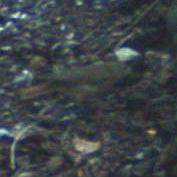

In [192]:
im = Image.open('/home/wliao14/crops/'+random.choice(path))
print(f'There are total {len(path)} Falsely Predict as {predict} ')
print(f'Ground Truth is {label}, but it predict as {predict}')  
im 

In [193]:
set([i.split('/')[2] for i in path])

{'p_000509_fc3081d0a744e55f92588d02096fd641.jpg___crop00.jpg',
 'p_000688_77d066e4f790616e04b78ec30a82db5d.jpg___crop00.jpg',
 'p_000826_c2f12d32d604901b0c1d3fa06e56e63d.jpg___crop00.jpg',
 'p_011174_2e5657f790b39f31d2599fba93f439c1.jpg___crop00.jpg',
 'p_011239_fb2ff072b07161a24e19570f95f015cc.jpg___crop00.jpg',
 'p_011292_a3cedb475af3d98c8c163b5141487f60.jpg___crop00.jpg'}

### New experiment 

In [187]:
label = 'scrub jay'
predict = 'bird'

df_filter = df_val[(df_val['label'] == label) & (df_val['pred'] == predict)]
path = df_filter['path'].to_list()

There are total 31 Falsely Predict as bird 
Ground Truth is scrub jay, but it predict as bird
path:mirav2_dataset/X811494B/p_001826_0f458d7c64817280f5eadec96ee82163.jpg___crop00.jpg


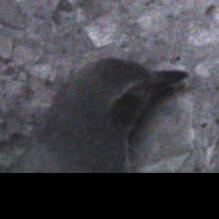

In [188]:
random_path = random.choice(path)
im = Image.open('/home/wliao14/crops/'+random_path)
print(f'There are total {len(path)} Falsely Predict as {predict} ')
print(f'Ground Truth is {label}, but it predict as {predict}')  
print(f'path:{random_path}')
im 

In [189]:
set([i.split('/')[1] for i in path])

{'X811494B'}